In [ ]:
pip install texttable

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,}

### Model1 Results --first model

>DT 0.733 (0.013)
>GB 0.763 (0.011)
>MLP 0.810 (0.007)
>KNN 0.801 (0.008)
>SGD 0.833 (0.005)
>LR 0.832 (0.004)
>SVC 0.835 (0.005)


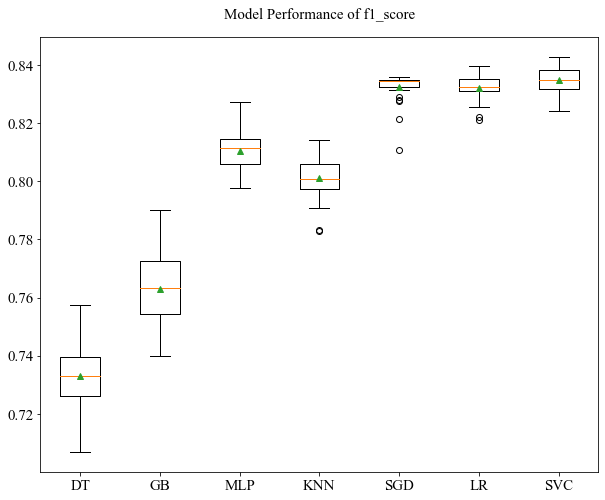

In [ ]:
results1 = np.load('results1.npy')
results1 = results1.tolist()

names1 = np.load('names1.npy')
names1 = names1.tolist()

for i in range (len(results1)):
    print('>%s %.3f (%.3f)' % (names1[i], np.mean(results1[i]), np.std(results1[i]))) 

plt.figure(figsize=(10,8))
plt.title('Model Performance of f1_score',font1, y = 1.03)
plt.xticks(fontsize=15,fontproperties = 'Times New Roman')
plt.yticks(fontsize=15,fontproperties = 'Times New Roman')
plt.boxplot(results1, labels=names1, showmeans=True)  
plt.savefig('model1 Performance.png',dpi=300, bbox_inches = 'tight')
plt.show()

### Model2 Results --first model after Optimizing

>DT 0.736 (0.011)
>GB 0.764 (0.011)
>MLP 0.821 (0.008)
>KNN 0.836 (0.004)
>SGD 0.834 (0.004)
>LR 0.832 (0.005)
>SVC 0.835 (0.003)


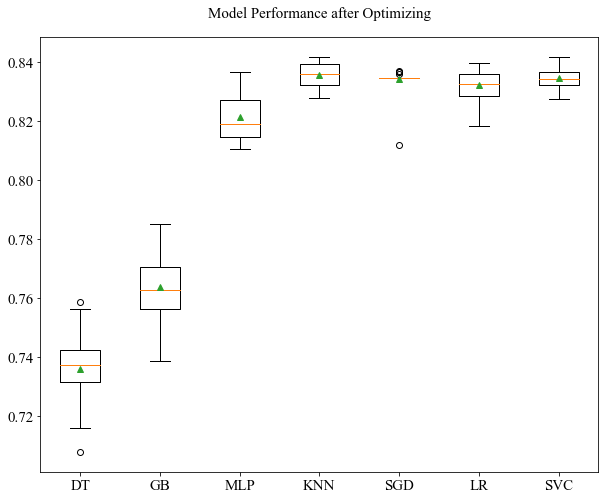

In [ ]:
names2 = np.load('names2.npy')
results2 = np.load('results2.npy')
results2 = results2.tolist()

for i in range (len(results2)):
    print('>%s %.3f (%.3f)' % (names2[i], np.mean(results2[i]), np.std(results2[i]))) 

plt.figure(figsize=(10,8))
plt.title('Model Performance after Optimizing',font1, y = 1.03)
plt.xticks(fontsize=15,fontproperties = 'Times New Roman')
plt.yticks(fontsize=15,fontproperties = 'Times New Roman')
plt.boxplot(results2,labels=names2,  showmeans=True)  
plt.savefig('model2 Performance.png',dpi=300, bbox_inches = 'tight')
plt.show()

### Compare results with after optimizing parameters

In [ ]:
a = (pd.DataFrame(results1).T).mean()
b = (pd.DataFrame(results2).T).mean()

aa = pd.DataFrame(a).T
bb = pd.DataFrame(b).T
c = pd.concat([aa,bb])

In [ ]:
import pandas as pd
from texttable import Texttable
tb=Texttable()
tb.header(names1) 
tb.add_rows(c.values,header=False)
print(tb.draw())

+-------+-------+-------+-------+-------+-------+-------+
|  DT   |  GB   |  MLP  |  KNN  |  SGD  |  LR   |  SVC  |
+=======+=======+=======+=======+=======+=======+=======+
| 0.733 | 0.763 | 0.810 | 0.801 | 0.833 | 0.832 | 0.835 |
+-------+-------+-------+-------+-------+-------+-------+
| 0.736 | 0.764 | 0.821 | 0.836 | 0.834 | 0.832 | 0.835 |
+-------+-------+-------+-------+-------+-------+-------+


### Choose a model 

In [ ]:
# 1.Stastical test --Analysis of Variance Test (ANOVA)
from scipy.stats import f_oneway
statistic, A_value = f_oneway(results2[0],results2[1],results2[2],results2[3],results2[4],results2[5],results2[6])
print(statistic, A_value)

893.3265774024262 5.688081965617501e-143


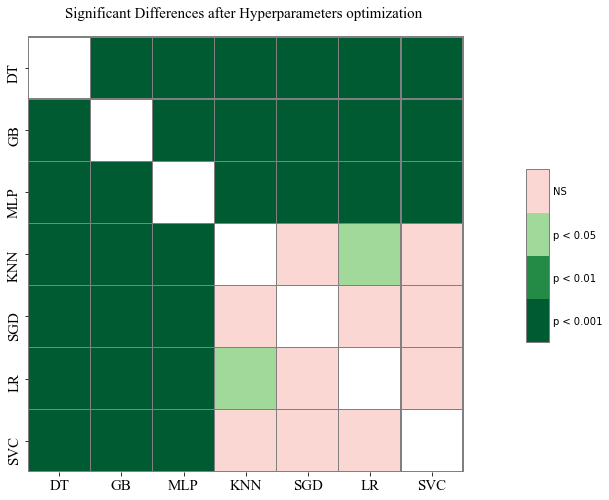

In [ ]:
# 2.Posthocs test
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
import numpy as np
pc = sp.posthoc_ttest(results2,p_adjust='holm')
pc.columns=names2
pc.index = names2

plt.figure(figsize=(8,8))
plt.title('Significant Differences after Hyperparameters optimization ',font1, y = 1.03)
plt.xticks(fontsize=15,fontproperties = 'Times New Roman')
plt.yticks(fontsize=15,fontproperties = 'Times New Roman')
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [1, 0.35, 0.04, 0.3]}
sp.sign_plot(pc,**heatmap_args )
plt.savefig('Sign2.png', dpi=300, bbox_inches = 'tight')

### Avoid Overfitting

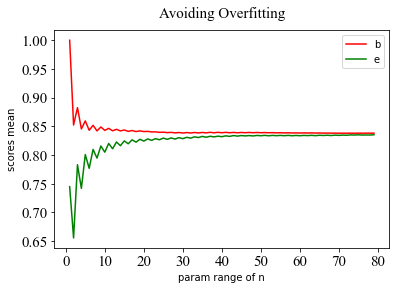

In [ ]:
test_scores_mean = np.load('test_scores_mean.npy')
test_scores_mean = test_scores_mean.tolist()

train_scores_mean = np.load('train_scores_mean.npy')
train_scores_mean = train_scores_mean.tolist()

param_range = np.load('param_range.npy')
param_range = param_range.tolist()

plt.plot(param_range,train_scores_mean, color='red', label='train')
plt.plot(param_range, test_scores_mean, color='green', label='test')
plt.legend('best')
plt.xlabel('param range of n')
plt.ylabel('scores mean')

plt.title('Avoiding Overfitting',font1, y = 1.03)
plt.xticks(fontsize=15,fontproperties = 'Times New Roman')
plt.yticks(fontsize=15,fontproperties = 'Times New Roman')
plt.show()

### 

### Final  Model

>KNN 0.834 (0.004)
>KNNbag 0.836 (0.003)
>Stacking 0.835 (0.006)
>Boosting 0.837 (0.004)
>ET 0.837 (0.004)
>Voting 0.838 (0.003)


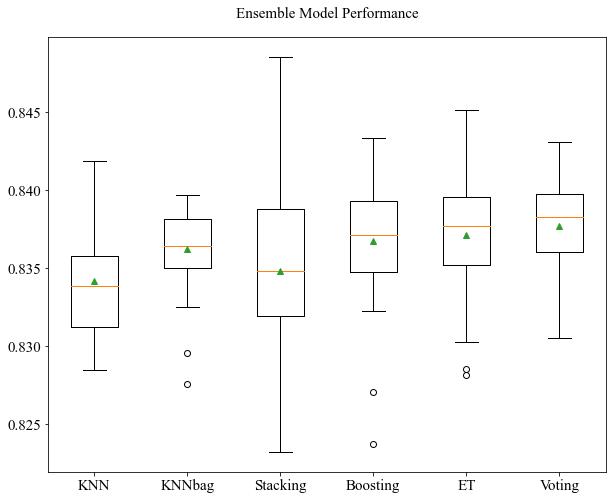

In [ ]:
names3 = np.load('names3.npy')
results3 = np.load('results3.npy')
results3 = results3.tolist()

for i in range (len(results3)):
    print('>%s %.3f (%.3f)' % (names3[i], np.mean(results3[i]), np.std(results3[i]))) 

plt.figure(figsize=(10,8))
plt.title('Ensemble Model Performance',font1, y = 1.03)
plt.xticks(fontsize=15,fontproperties = 'Times New Roman')
plt.yticks(fontsize=15,fontproperties = 'Times New Roman')
plt.boxplot(results3,labels=names3,  showmeans=True)  
plt.savefig('Final Model Performance.png',dpi=300, bbox_inches = 'tight')
plt.show()

### Compare with first model 

In [ ]:
#1.Analysis of Variance Test -- Prove this is more powerful than the model choosing in the first 
from scipy import stats
stat, pvalue = stats.ttest_ind(results3[0],results3[-1])
print(stat, pvalue)

-3.8757927133867613 0.00027319155999893003


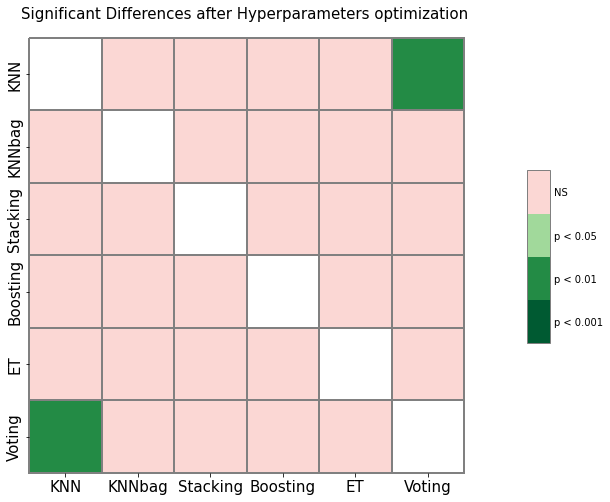

In [8]:
# 2.Posthocs test
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
import numpy as np

pc = sp.posthoc_ttest(results3,p_adjust='holm')
pc.columns=names3
pc.index = names3

plt.figure(figsize=(8,8))
plt.title('Significant Differences after Hyperparameters optimization ',font1, y = 1.03)
plt.xticks(fontsize=15,)
plt.yticks(fontsize=15,)
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [1, 0.35, 0.04, 0.3]}
sp.sign_plot(pc,**heatmap_args )
plt.savefig('Sign2.png', dpi=300, bbox_inches = 'tight')

### Avoid Overfitting

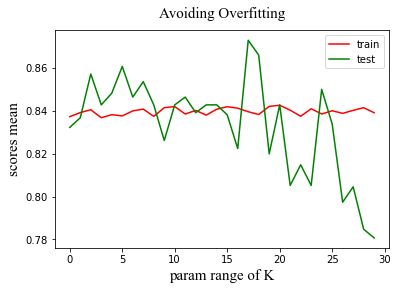

In [ ]:
Vot_acc_trainlist = np.load('Vot_acc_trainlist.npy')
Vot_acc_trainlist = Vot_acc_trainlist.tolist()

Vot_acc_testlist = np.load('Vot_acc_testlist.npy')
Vot_acc_testlist = Vot_acc_testlist.tolist()

plt.plot(Vot_acc_trainlist, color='red', label='train')
plt.plot(Vot_acc_testlist, color='green', label='test')
plt.legend(['train', 'test'])
plt.xlabel('param range of K',fontsize=15,fontproperties = 'Times New Roman')
plt.ylabel('scores mean',fontsize=15,fontproperties = 'Times New Roman')
plt.title('Avoiding Overfitting',font1, y = 1.03)
plt.savefig('Overfitting2.png', dpi=300, bbox_inches = 'tight')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b150ef30-52fe-41e2-b3cd-643278d2147a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>